In [1]:
import SpinDynamics as sd
import qutip as qt
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy as spy
from scipy import interpolate
from scipy.optimize import minimize

from joblib import Parallel, delayed
import multiprocessing

In [2]:
x = np.linspace(0,10,100)
f = lambda x: np.exp(x)

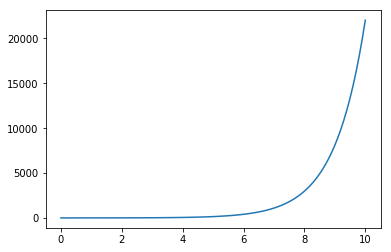

In [3]:
#a normal exponential
plt.plot(x,f(x))
plt.show()

In [4]:
N = 5
a0 = 0.2
k = 1

coef = np.random.rand(N,2).ravel()

para = np.array([k, *coef])

In [5]:
#function that models the function as a fourier series with random initial parameters
def f_approx(para, x):
    N = para.size//2
    k = para[0]
    coef = para[1:].reshape(N,2)
    return (coef[...,None] * np.array([[np.sin(i*k*x), np.cos(i*k*x)] 
                                       for i in range(N)])
           ).sum((0,1))

#function that determines the error of f_approx
def error(para):
    return np.sqrt(((f(x)-f_approx(para, x))**2).sum())

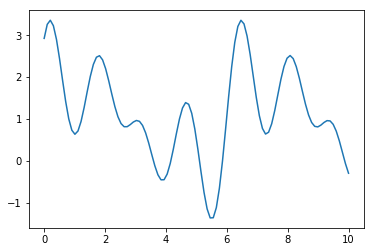

In [6]:
plt.plot(x, f_approx(para, x))
plt.show()

In [12]:
#minimize the error of the parameters trying to replicate the function
result = minimize(error, para, method='Powell',tol=1e-5)

In [14]:
result.fun

2448.587079958896

In [15]:
result.x

array([ 7.52871695e-02,  1.57892916e+05,  6.95587682e+05,  7.04252660e+05,
       -6.77494962e+05, -2.25219594e+05, -6.94777781e+05, -1.21423488e+05,
        1.03721214e+06,  2.71429749e+04, -3.60340268e+05])

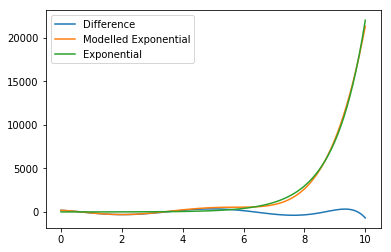

In [18]:
plt.plot(x, f_approx(result.x, x)-f(x), label="Difference")
plt.plot(x, f_approx(result.x,x), label="Modelled Exponential")
plt.plot(x, f(x), label="Exponential")
plt.legend()
plt.show()

In [19]:
#inter = interpolate.interp1d(x, f_approx(result.x,x))

In [20]:
#plt.plot(inter)